In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing all the necessary modules

In [3]:
registered = pd.read_csv("registered applicants.csv") #Loading the data set for registered
registered

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,2373,Brian,May,Social Media,Python For DataScience,Weekend,Male
1,758,Leon,Melvin,Social Media,Product Design(UI/UX),Weekend,Male
2,2287,Juan,Harris,Mr Simps,Product Design(UI/UX),Weekday,Male
3,2480,Gilbert,Denson,Social Media,Figma Design to Webflow,Weekend,Male
4,1359,Larry,Williams,WEBSITE,Python For DataScience,Weekday,Male
...,...,...,...,...,...,...,...
3671,1990,Donald,Peno,Social Media,Python For Data Science,Weekday,Male
3672,245,Patrick,Azar,Mr Simps,Full Stack,Weekday,Male
3673,2548,Billy,Jones,WEBSITE,Full Stack,ONLINE,Male
3674,2162,Luis,Tellez,Social Media,Full Stack,Weekday,Male


In [4]:
enrolled = pd.read_csv("enrolled applicants.csv") #Loading the dataset for enrolled
enrolled

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,1120,Robert,Mccain,WEBSITE,Full Stack,Weekday,Male
1,2557,Russel,Reagin,Mr Simps,Full Stack,Weekday,Male
2,1682,Barry,Dickson,WEBSITE,Full Stack,Weekday,Male
3,1961,Allen,Williams,Mr Simps,NaN,Weekday,Male
4,295,Brian,Bryon,Social Media,Python For Data Science,Weekend,Male
...,...,...,...,...,...,...,...
1761,2020,Edward,Johnston,WEBSITE,Backend With Python Django,Weekday,Male
1762,1295,Brian,Hargrove,Social Media,Full Stack,Weekday,Male
1763,2827,Grady,Sullens,Social Media,Frontend Web Development,ONLINE,Male
1764,1894,Felipe,Fassino,Social Media,Figma Design to Webflow,Weekday,Male


## Plotting the data to glean insight

<AxesSubplot:xlabel='GENDER', ylabel='count'>

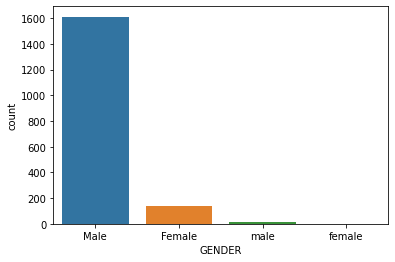

In [5]:
sns.countplot(x = enrolled['GENDER'], data=enrolled)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

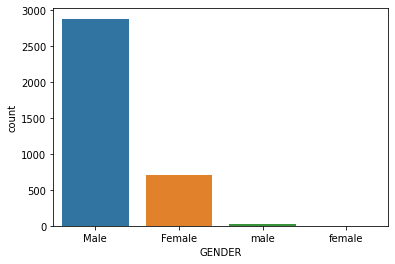

In [6]:
sns.countplot(x = registered['GENDER'], data=registered)

There are 4 categories fror GENDER instead of two, some are with small letters while others are with capital

In [7]:
enrolled['GENDER'].replace({'female':'Female', 'male':'Male'}, inplace = True) #replacing the small lettered genders with capital letter
registered['GENDER'].replace({'female':'Female', 'male':'Male'}, inplace = True)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

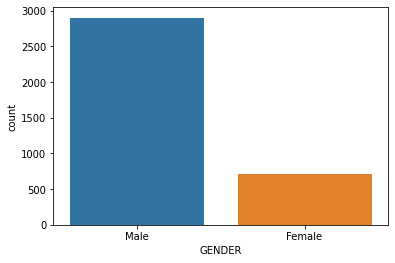

In [8]:
sns.countplot(x = registered['GENDER'], data=registered)

<AxesSubplot:xlabel='GENDER', ylabel='count'>

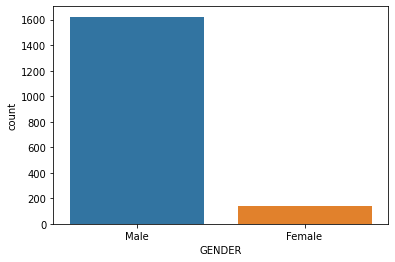

In [9]:
sns.countplot(x = enrolled['GENDER'], data=enrolled)

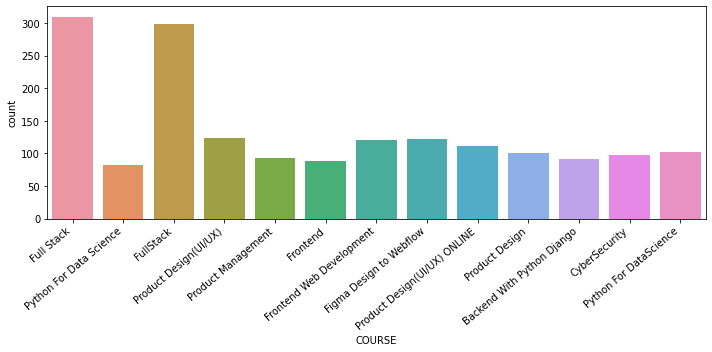

In [10]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = enrolled['COURSE'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

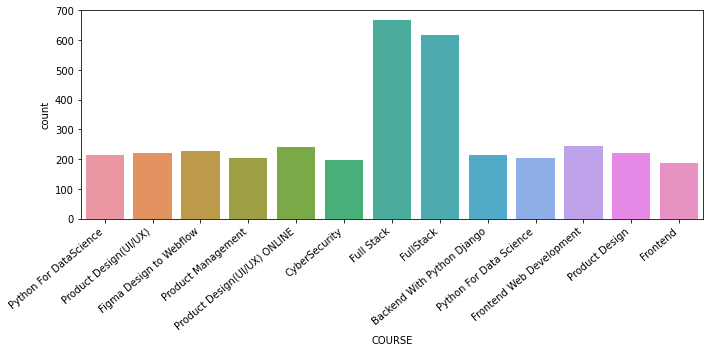

In [11]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = registered['COURSE'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

There are duplicates here that need to be joined together, like in the case of 'Python for DataScience' and 'Python for Data Science'

In [12]:
enrolled['COURSE'].replace({'FullStack':'Full Stack', 'Python For DataScience':'Python For Data Science'}, inplace = True)
registered['COURSE'].replace({'FullStack':'Full Stack', 'Python For DataScience':'Python For Data Science'}, inplace = True) 
#replacing the fullstack and python with their counterparts that have spaces inbetween

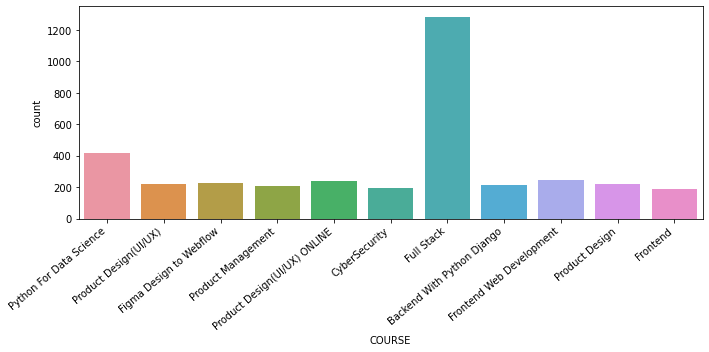

In [13]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = registered['COURSE'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

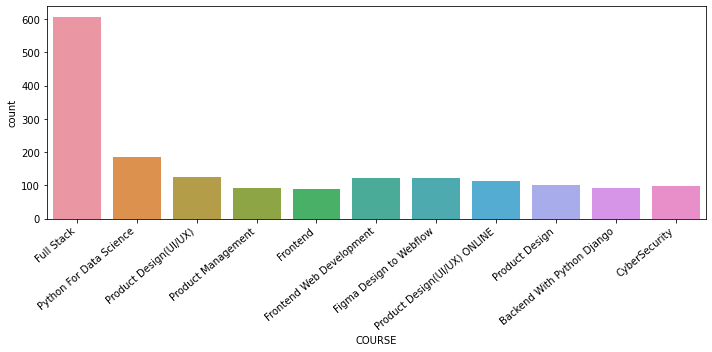

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = enrolled['COURSE'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

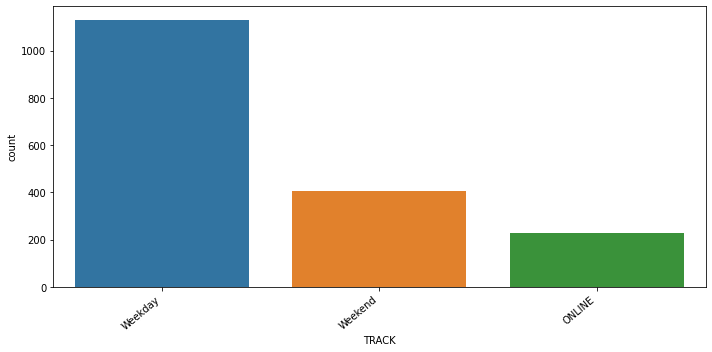

In [15]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = enrolled['TRACK'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

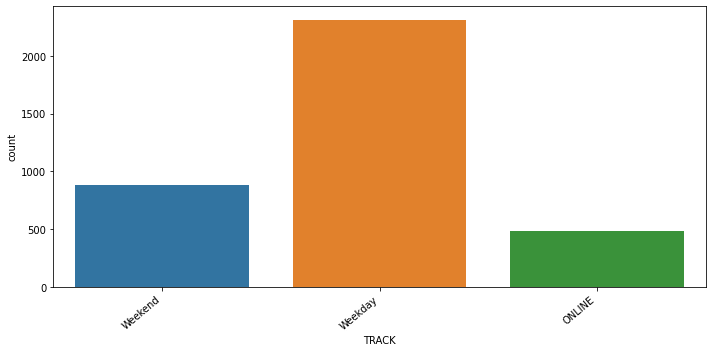

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = registered['TRACK'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

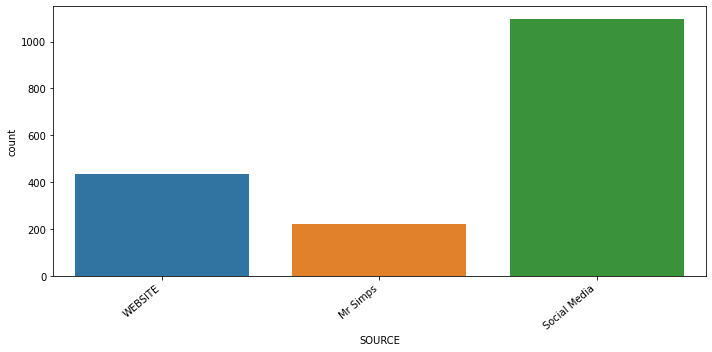

In [17]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = enrolled['SOURCE'], data=enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

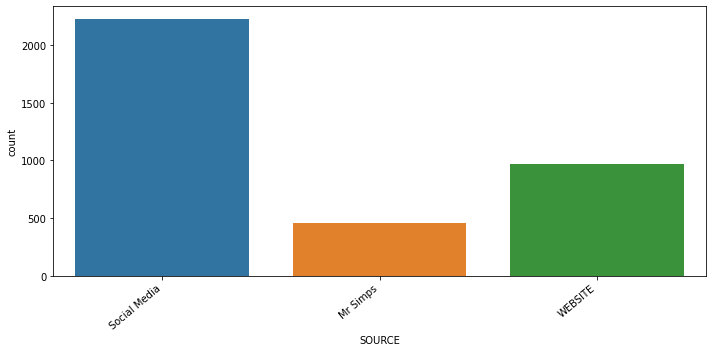

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = registered['SOURCE'], data=registered)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Dealing with missing Values

In [19]:
enrolled.isnull().sum()

Unnamed: 0     0
FIRST NAME     0
LAST NAME      0
SOURCE        12
COURSE        25
TRACK          0
GENDER         0
dtype: int64

 Missing values for enrolled are mostly in the source and the course

In [20]:
registered.isnull().sum()

Unnamed: 0     0
FIRST NAME     0
LAST NAME      0
SOURCE        26
COURSE        25
TRACK          0
GENDER        56
dtype: int64

The registered has missing values in the Gender column as well as the other two.

In [21]:
registered[registered['GENDER'].isnull()]

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
62,192,Robert,Parker,Social Media,Frontend,ONLINE,NaN
124,1877,Joseph,Macdougall,WEBSITE,Python For Data Science,Weekday,NaN
190,2186,Vicente,Elkins,WEBSITE,Full Stack,Weekday,NaN
264,1917,Charles,Mcknight,Social Media,Frontend,Weekday,NaN
328,1087,Leslie,Montes,Mr Simps,Full Stack,Weekend,NaN
392,1035,Nick,Lynn,Social Media,Full Stack,Weekday,NaN
464,1679,Matthew,Joy,Social Media,Full Stack,Weekend,NaN
533,1534,Joseph,Reyes,Mr Simps,Backend With Python Django,Weekday,NaN
598,2602,Walter,Waters,Social Media,Full Stack,Weekend,NaN
661,2895,Garry,Zombory,WEBSITE,Frontend Web Development,ONLINE,NaN


In [22]:
enrolled[enrolled['COURSE'].isnull()].sort_values(by='FIRST NAME')

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
3,1961,Allen,Williams,Mr Simps,NaN,Weekday,Male
695,1771,Brian,Wetherbee,Social Media,NaN,Weekday,Male
1063,1610,Cameron,Alves,Mr Simps,NaN,Weekday,Male
281,2164,Cory,Martinelli,Social Media,NaN,Weekday,Male
1224,366,Daryl,Bender,WEBSITE,NaN,Weekday,Male
1046,2338,Frank,Bilbrey,Mr Simps,NaN,Weekend,Male
1617,439,Fred,Stone,Social Media,NaN,Weekend,Male
953,1100,George,Wood,Social Media,NaN,Weekday,Male
54,2002,Harry,Ashby,WEBSITE,NaN,Weekend,Male
632,1466,Jackson,Bryant,Social Media,NaN,Weekday,Male


In [23]:
registered[registered['COURSE'].isnull()].sort_values(by='FIRST NAME')

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
1832,1961,Allen,Williams,Mr Simps,NaN,Weekday,Male
1531,1771,Brian,Wetherbee,Social Media,NaN,Weekday,Male
1305,1610,Cameron,Alves,Mr Simps,NaN,Weekday,Male
1751,2164,Cory,Martinelli,Social Media,NaN,Weekday,Male
1235,366,Daryl,Bender,WEBSITE,NaN,Weekday,Male
794,2338,Frank,Bilbrey,Mr Simps,NaN,Weekend,Male
500,439,Fred,Stone,Social Media,NaN,Weekend,Male
278,1100,George,Wood,Social Media,NaN,Weekday,Male
575,2002,Harry,Ashby,WEBSITE,NaN,Weekend,Male
1375,1466,Jackson,Bryant,Social Media,NaN,Weekday,Male


All the people that have missing values for course agot enrolled

The number of people that have missing values in the COURSE column are the same for registered and enrolled. After looking through it's the same exact people.

In [24]:
registered[registered['SOURCE'].isnull()]

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
814,785,James,Spring,NaN,Backend With Python Django,Weekday,Male
926,1847,David,Rivera,NaN,Frontend,Weekday,Male
1036,1356,Gerald,Mcnally,NaN,Python For Data Science,ONLINE,Male
1151,487,Charles,Weis,NaN,Full Stack,Weekend,Male
1259,437,Troy,Velasquez,NaN,Product Design(UI/UX) ONLINE,Weekend,Male
1367,2738,William,Shock,NaN,Full Stack,Weekday,Male
1480,787,Robert,Lewis,NaN,Product Management,Weekday,Male
1594,1713,Wilbert,Young,NaN,Full Stack,Weekday,Male
1703,1196,David,Baker,NaN,Product Design(UI/UX),Weekday,Male
1828,2323,John,Yazzie,NaN,Product Design,ONLINE,Male


In [25]:
registered['GENDER'] = registered['GENDER'].fillna(registered['GENDER'].mode()[0])

In [26]:
registered['GENDER'].isnull().sum()

0

In [27]:
no_f_enrolled = enrolled['GENDER'][enrolled['GENDER'] == 'Female']
no_f_registered = registered['GENDER'][registered['GENDER'] == 'Female']

In [36]:
Probabilty_female = no_f_enrolled.count() / no_f_registered.count()
Probabilty_female

0.199442119944212

In [38]:
no_m_enrolled = enrolled['GENDER'][enrolled['GENDER'] == 'Male']
no_m_registered = registered['GENDER'][registered['GENDER'] == 'Male']

In [42]:
Probabilty_male = no_m_enrolled.count() / no_m_registered.count()
Probabilty_male

0.5484961135518757

In [45]:
Probabilty_total = enrolled['GENDER'].count() / registered['GENDER'].count()
Probabilty_total

0.4804134929270947

## CONCLUSION
From the data provided we can glean the following insights:
1. Most of the people heard about the program through social media
2. The course most applied for is Fullstack
3. The gender that applied most and got enrolled the most are the maen
4. Most of the people applied and were enrolled for the Weekday courses

## Probality
1. The probabilty of a female registering and being enrolled is 0.199442
2. The probabilty of a male registering and being enrolled is 0.548496
3. The probabilty of a a person whp registered will be enrolled is 0.480413